Rutas de imágenes a procesar: ['../data/pedestrians/pedestrian1.jpeg', '../data/pedestrians/pedestrian2.jpeg', '../data/pedestrians/pedestrian3.jpeg', '../data/pedestrians/pedestrian4.jpeg', '../data/pedestrians/pedestrian5.jpeg', '../data/pedestrians/pedestrian6.jpeg', '../data/pedestrians/pedestrian7.jpeg', '../data/pedestrians/pedestrian8.jpeg', '../data/pedestrians/pedestrian9.jpeg']
[INFO] pedestrian1.jpeg: 3 Cajas originales, 3 después de la supresión
[INFO] Imágenes guardadas: hog/pedestrian1_antes.jpg, hog/pedestrian1_despues.jpg
[INFO] pedestrian2.jpeg: 2 Cajas originales, 2 después de la supresión
[INFO] Imágenes guardadas: hog/pedestrian2_antes.jpg, hog/pedestrian2_despues.jpg
[INFO] pedestrian3.jpeg: 2 Cajas originales, 2 después de la supresión
[INFO] Imágenes guardadas: hog/pedestrian3_antes.jpg, hog/pedestrian3_despues.jpg
[INFO] pedestrian4.jpeg: 1 Cajas originales, 1 después de la supresión
[INFO] Imágenes guardadas: hog/pedestrian4_antes.jpg, hog/pedestrian4_despues.j

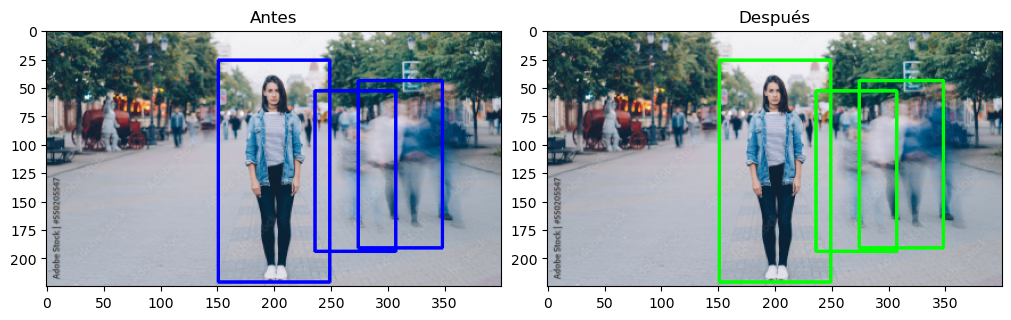

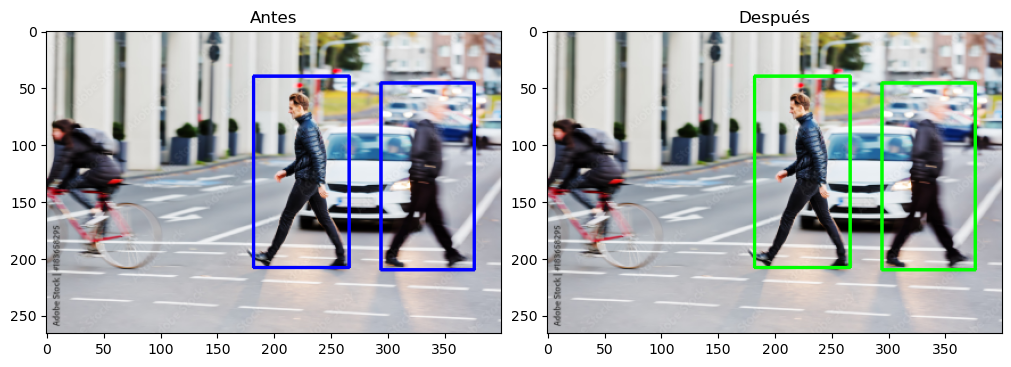

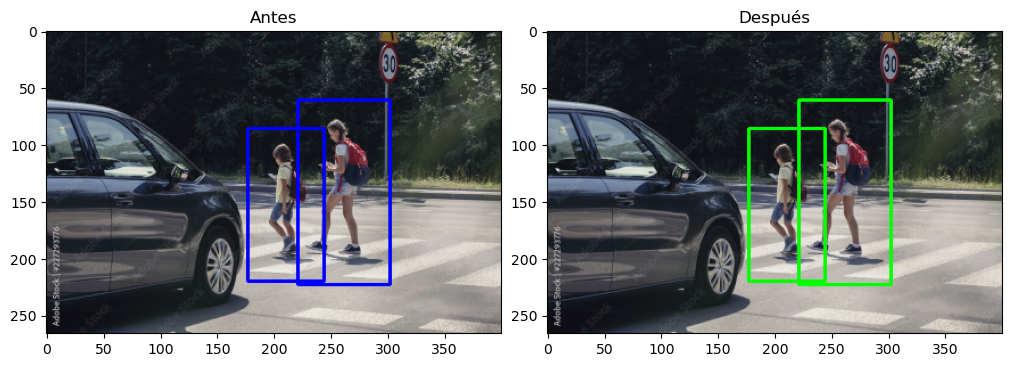

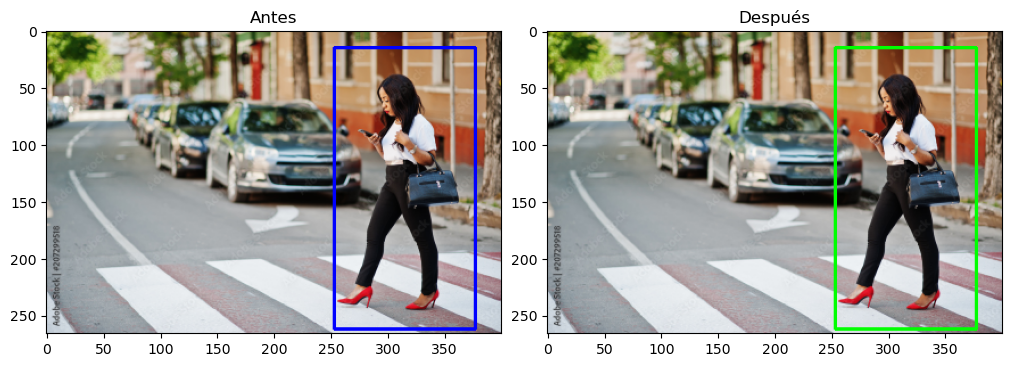

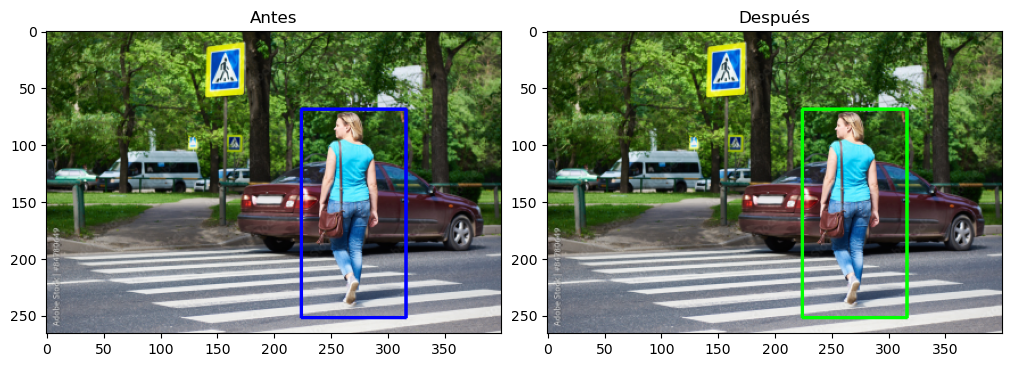

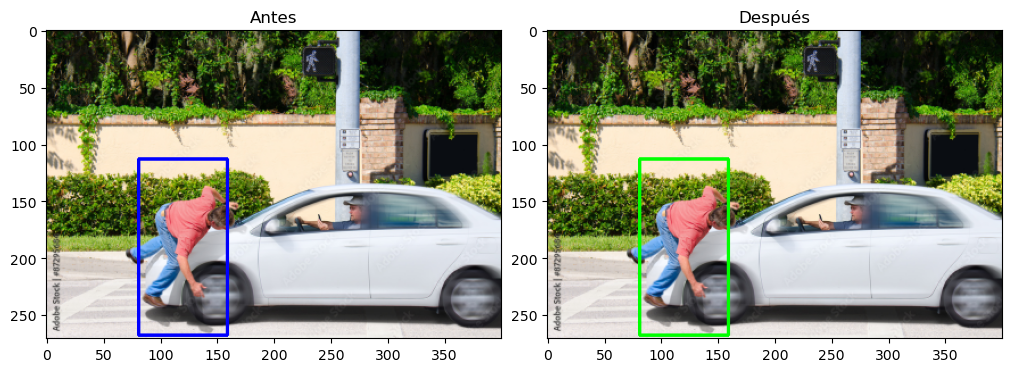

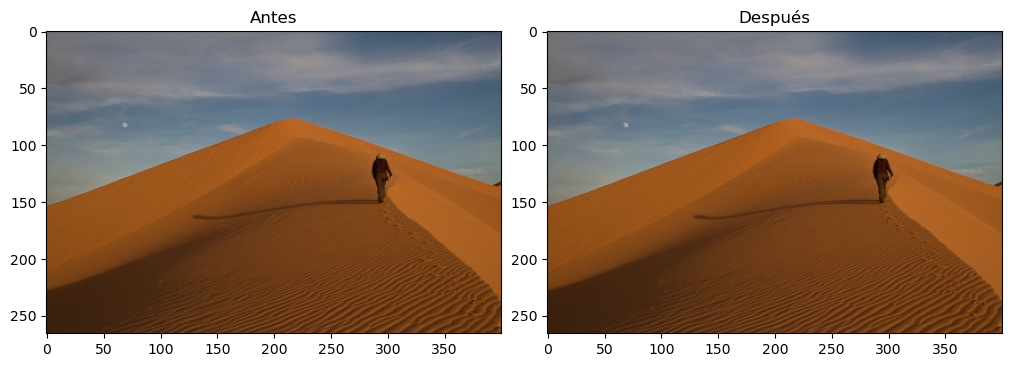

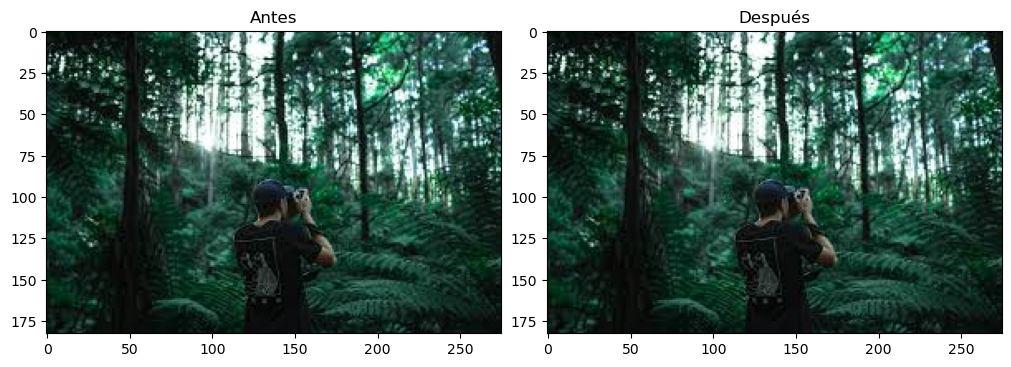

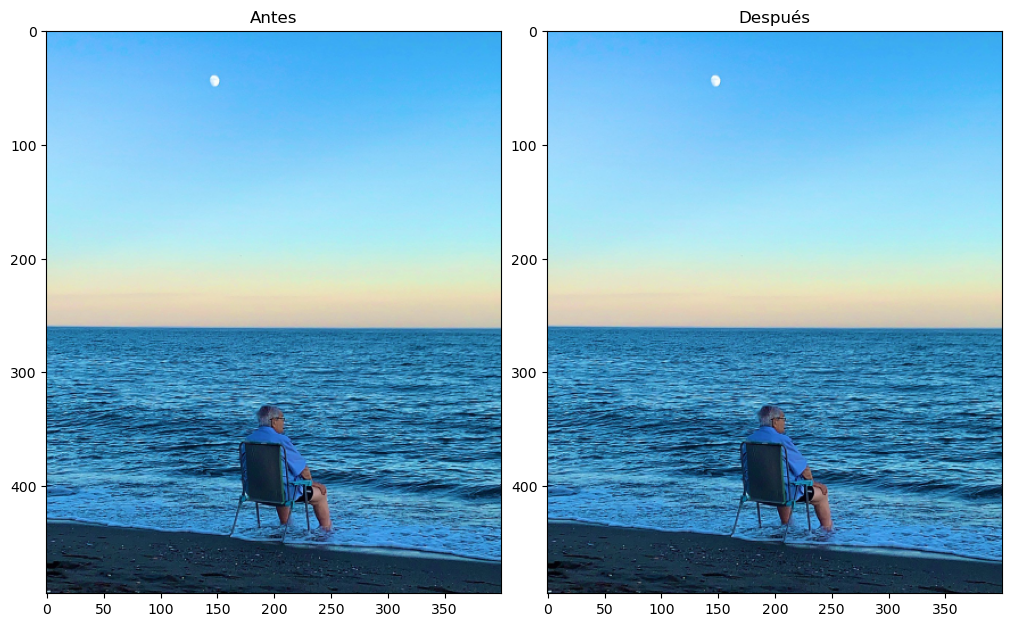

In [3]:
"""
Detección de peatones utilizando Histogramas de Gradientes Orientados (HoG)
y Máquinas de Vectores Soporte (SVM). Además, se guardan las imágenes procesadas.
"""

import sys
sys.path.insert(0, '../')

from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import imutils
import cv2
import imageio  # Opcional, si se desea usar para otras operaciones
import resources as src

def image_path(index):
    """Genera la ruta de la imagen en función del índice proporcionado."""
    return f'../data/pedestrians/pedestrian{index}.jpeg'

# Lista de rutas de imágenes a procesar
pedestrians = [image_path(i+1) for i in range(9)]
print("Rutas de imágenes a procesar:", pedestrians)

# Inicialización del descriptor HoG y configuración del detector SVM para peatones
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Itera sobre cada imagen
for imagePath in pedestrians:
    # Cargar la imagen y validar la carga
    image = cv2.imread(imagePath)
    if image is None:
        print(f"[ERROR] No se pudo cargar la imagen: {imagePath}")
        continue

    # Convertir la imagen de BGR a RGB para el procesamiento y visualización
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Redimensionar la imagen para mejorar la eficiencia
    image = imutils.resize(image, width=min(400, image.shape[1]))
    
    # Copia de la imagen para las detecciones iniciales (en rojo)
    orig = image.copy()
    
    # Detección de personas en la imagen utilizando HoG/SVM
    (rects, weights) = hog.detectMultiScale(image, winStride=(6, 6),
                                            padding=(8, 8), scale=1.05)
    
    # Dibujar rectángulos rojos en las detecciones iniciales
    for (x, y, w, h) in rects:
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Convertir las coordenadas para la supresión de no-máximos
    rects_np = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    
    # Aplicar la supresión de no-máximos (NMS)
    pick = non_max_suppression(rects_np, probs=None, overlapThresh=0.65)

    # Dibujar los rectángulos finales (en verde) después de aplicar NMS
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

    # Mostrar información en consola
    filename = imagePath[imagePath.rfind("/") + 1:]
    print("[INFO] {}: {} Cajas originales, {} después de la supresión".format(
        filename, len(rects), len(pick)))
    
    # Mostrar las imágenes (si es necesario)
    src.mostrar_imagenes(1, 2, ['Antes', 'Después'], [orig, image], 10, 7, (True, True))
    
    # Guardar las imágenes procesadas
    # Nota: Convertimos de nuevo a BGR para que los colores se guarden correctamente
    output_orig = cv2.cvtColor(orig, cv2.COLOR_RGB2BGR)
    output_final = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # Construir nombres de archivo basados en el nombre original
    output_path_orig = f"hog/{filename.split('.')[0]}_antes.jpg"
    output_path_final = f"hog/{filename.split('.')[0]}_despues.jpg"
    
    # Guardar las imágenes
    cv2.imwrite(output_path_orig, output_orig)
    cv2.imwrite(output_path_final, output_final)
    
    print(f"[INFO] Imágenes guardadas: {output_path_orig}, {output_path_final}")
